In [1]:
# make quantum circuit
import qiskit as q

qc = q.QuantumCircuit(2, 2)  # map 2 qbits to 2 cbits
qc.h(0)  # set Hadamard gate on qubit 0 --> qubit 0 is in superposition
qc.cx(0, 1)  # set controlled not gate with target qbit 1, control qbit 0 (the one in superposition)
qc.measure([0, 1], [0, 1])  # measure --> collapse each qbit into a cbit

qc.draw()

In [2]:
q.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# run job on the least busy IBM quantum computer

from qiskit.tools.monitor import job_monitor

provider = q.IBMQ.get_provider("ibm-q")
queued = float("inf")

for backend in [backend for backend in provider.backends() if backend.properties()]: # discard simulator
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {len(backend.properties().qubits)} qubits")
    if backend.status().pending_jobs < queued:
        queued = backend.status().pending_jobs
        backend_to_use = backend
        
print(f"\nThe chosen backend is {backend_to_use.name()}, with a queue of {backend_to_use.status().pending_jobs} jobs.")

backend = provider.get_backend(backend_to_use.name())
job = q.execute(qc, backend=backend, shots=1024)
job_monitor(job)

ibmqx2 has 43 queued and 5 qubits
ibmq_16_melbourne has 9 queued and 14 qubits
ibmq_vigo has 8 queued and 5 qubits
ibmq_ourense has 6 queued and 5 qubits
ibmq_london has 21 queued and 5 qubits
ibmq_burlington has 7 queued and 5 qubits
ibmq_essex has 5 queued and 5 qubits

The chosen backend is ibmq_essex, with a queue of 5 jobs.
Job Status: job has successfully run


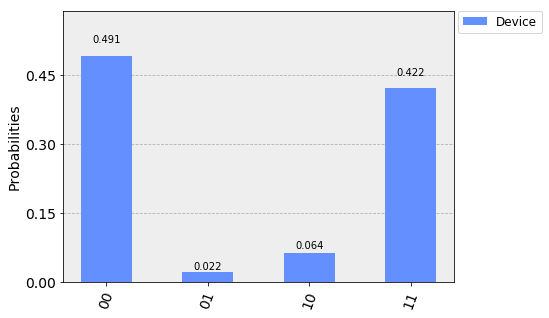

In [4]:
# plot result and see that the entangled qubits collapse to the same cbit value in the vast majority of cases,
# except for some cases due to internal noise of the quantum computer

from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(qc)

plot_histogram([counts], legend=['Device'])